In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train), len(y_train), len(X_test), len(y_test)

(60000, 60000, 10000, 10000)

In [4]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

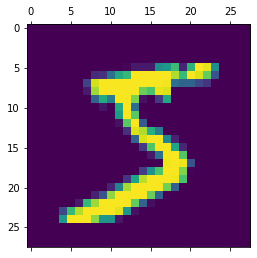

In [7]:
plt.matshow(X_train[0])

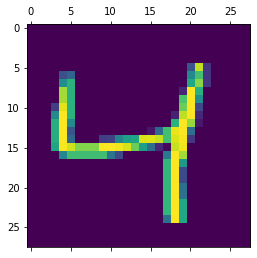

In [8]:
plt.matshow(X_train[2])

In [9]:
# Normalize the values.

X_train = X_train/ 255
X_test = X_test/ 255

X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

X_train_flattened.shape, X_test_flattened.shape

((60000, 784), (10000, 784))

In [11]:
X_train_flattened[0].shape

(784,)

In [12]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784, ), activation = 'sigmoid')
])

model.compile(optimizer = 'adam', metrics = ['accuracy'], loss = 'sparse_categorical_crossentropy')
model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7350 - accuracy: 0.8065
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3105 - accuracy: 0.9143
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2770 - accuracy: 0.9215
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2696 - accuracy: 0.9248
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2615 - accuracy: 0.9269


In [13]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 853us/step - loss: 0.2669 - accuracy: 0.9253


[0.2669212222099304, 0.9253000020980835]

In [14]:
y_pred = model.predict(X_test_flattened)

y_pred[0]

array([3.5808384e-02, 3.2640924e-07, 7.6483399e-02, 9.6473253e-01,
       2.5749207e-03, 1.3264740e-01, 3.1162931e-06, 9.9984419e-01,
       9.4703019e-02, 6.3929784e-01], dtype=float32)

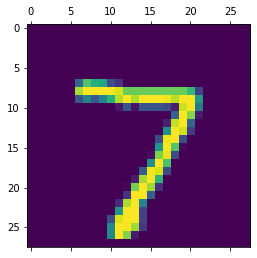

In [16]:
plt.matshow(X_test[0])

In [17]:
np.argmax(y_pred[0])

7

In [20]:
y_predicted_labels = [np.argmax(i)for i in y_pred]

y_predicted_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [21]:
cm = tf.math.confusion_matrix(y_test, y_predicted_labels)

cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    1,    2,    0,    5,    7,    2,    1,    0],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [   5,    9,  928,   15,    9,    4,   13,    9,   35,    5],
       [   4,    0,   19,  919,    0,   30,    3,   12,   13,   10],
       [   1,    1,    3,    2,  914,    0,   13,    5,    8,   35],
       [   8,    2,    3,   27,    8,  787,   19,    8,   23,    7],
       [   9,    3,    4,    1,    7,   13,  918,    2,    1,    0],
       [   1,    5,   22,    7,    4,    1,    0,  963,    2,   23],
       [   9,    7,    8,   28,    9,   36,   10,   14,  840,   13],
       [  11,    7,    1,   11,   25,    8,    0,   35,    2,  909]])>

Text(69.0, 0.5, 'Truth')

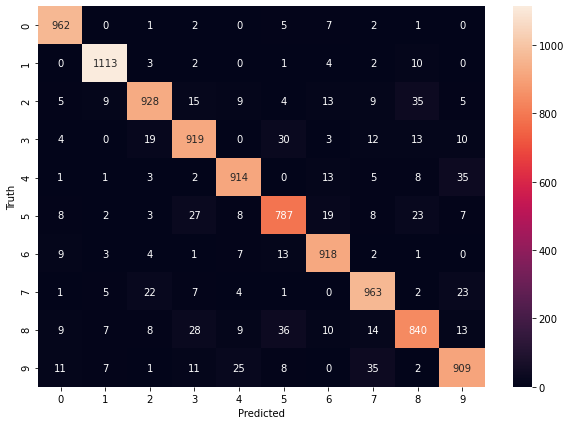

In [22]:
import seaborn as sns

plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Truth")

### Using Hidden layers

In [23]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784, ), activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4527 - accuracy: 0.8733
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1326 - accuracy: 0.9599
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0842 - accuracy: 0.9744
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0664 - accuracy: 0.9792
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0507 - accuracy: 0.9846


In [24]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0722 - accuracy: 0.9786


[0.07219695299863815, 0.978600025177002]

In [39]:
y_pred_hidden = model.predict(X_test_flattened)

y_pred_hidden_labels = [np.argmax(i) for i in y_pred_hidden]
cm = tf.math.confusion_matrix(y_test, y_pred_hidden_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    2,    0,    1,    3,    3,    1,    3,    1],
       [   0, 1126,    3,    0,    0,    1,    2,    0,    3,    0],
       [   2,    1, 1016,    2,    2,    0,    2,    3,    4,    0],
       [   0,    1,    7,  988,    0,    9,    0,    1,    2,    2],
       [   0,    0,    2,    0,  961,    0,    6,    1,    1,   11],
       [   2,    0,    0,    4,    1,  879,    4,    0,    1,    1],
       [   3,    2,    1,    0,    4,    8,  936,    0,    4,    0],
       [   2,    5,   11,    4,    0,    0,    0,  995,    3,    8],
       [   2,    0,    8,    8,    3,    7,    1,    3,  938,    4],
       [   2,    3,    0,    7,    7,    2,    1,    3,    3,  981]])>

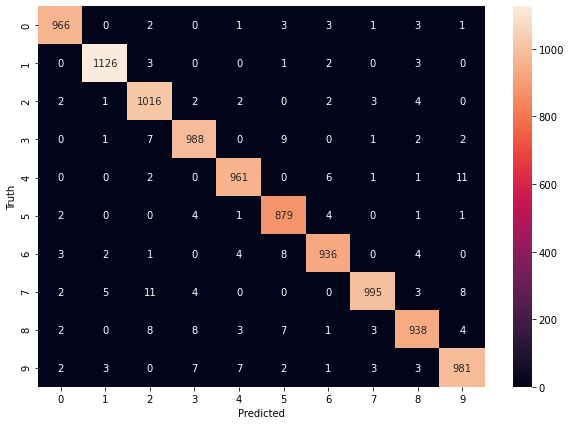

In [40]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

###  Using Flatten layer.

In [41]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(100, input_shape = (), activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(optimizer = 'adam', metrics = ['accuracy'], loss = 'sparse_categorical_crossentropy')
model.fit(X_train, y_train, epochs = 10, validation_data = (X_test, y_test),batch_size = 64)

Epoch 1/10
938/938 [==============================] - 2s 2ms/step - loss: 0.5213 - accuracy: 0.8531 - val_loss: 0.1744 - val_accuracy: 0.9492
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1588 - accuracy: 0.9556 - val_loss: 0.1210 - val_accuracy: 0.9645
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.1137 - accuracy: 0.9676 - val_loss: 0.1032 - val_accuracy: 0.9687
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0817 - accuracy: 0.9759 - val_loss: 0.0898 - val_accuracy: 0.9725
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0632 - accuracy: 0.9817 - val_loss: 0.0864 - val_accuracy: 0.9733
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0509 - accuracy: 0.9850 - val_loss: 0.0848 - val_accuracy: 0.9747
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0413 - accuracy: 0.9881 - val_loss: 0.0773 - val_accuracy: 0.9775
Epoch 

In [42]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 961us/step - loss: 0.0757 - accuracy: 0.9772


[0.07572837173938751, 0.9771999716758728]

In [48]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(400,  activation = 'relu'),
    keras.layers.Dense(200,  activation = 'relu'),
    keras.layers.Dense(100,  activation = 'relu'),
    keras.layers.Dense(10,   activation = 'sigmoid')
])

model.compile(optimizer = 'adam', metrics = ['accuracy'], loss = 'sparse_categorical_crossentropy')
model.fit(X_train, y_train, epochs = 5, validation_data = (X_test, y_test),batch_size = 64)

Epoch 1/5
938/938 [==============================] - 4s 4ms/step - loss: 0.3835 - accuracy: 0.8855 - val_loss: 0.0920 - val_accuracy: 0.9709
Epoch 2/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0868 - accuracy: 0.9726 - val_loss: 0.0821 - val_accuracy: 0.9741
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0532 - accuracy: 0.9831 - val_loss: 0.0760 - val_accuracy: 0.9753
Epoch 4/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0404 - accuracy: 0.9866 - val_loss: 0.0755 - val_accuracy: 0.9794
Epoch 5/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0323 - accuracy: 0.9894 - val_loss: 0.0938 - val_accuracy: 0.9750


In [49]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 400)               314000    
_________________________________________________________________
dense_22 (Dense)             (None, 200)               80200     
_________________________________________________________________
dense_23 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_24 (Dense)             (None, 10)                1010      
Total params: 415,310
Trainable params: 415,310
Non-trainable params: 0
_________________________________________________________________
